In [1]:
library(Seurat)
library(ggplot2)
library(enrichR)
library(stringr)
library(RColorBrewer)
library(pheatmap)
library(dplyr)
library(scales)
library(dplyr)
library(ComplexHeatmap)
library(circlize)
library(tidyr)
library(tibble)
library(grid)

Warning message:
“package ‘Seurat’ was built under R version 4.3.3”
Loading required package: SeuratObject

Warning message:
“package ‘SeuratObject’ was built under R version 4.3.3”
Loading required package: sp

Warning message:
“package ‘sp’ was built under R version 4.3.3”

Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t


Warning message:
“package ‘ggplot2’ was built under R version 4.3.3”
Welcome to enrichR
Checking connection ... 

Enrichr ... 
Connection is Live!

FlyEnrichr ... 
Connection is Live!

WormEnrichr ... 
Connection is Live!

YeastEnrichr ... 
Connection is Live!

FishEnrichr ... 
Connection is Live!

OxEnrichr ... 
Connection is Live!

Warning message:
“package ‘stringr’ was built under R version 4.3.3”
Warning message:
“package ‘RColorBrewer’ was built under R version 4.3.3”
Warning message:
“package ‘dplyr’ was built under R version 4.3.3”

Attaching package: ‘dplyr’


The following objects are masked from

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 11332
Number of edges: 631561

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8353
Number of communities: 11
Elapsed time: 2 seconds


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
10:27:15 UMAP embedding parameters a = 0.9922 b = 1.112

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

10:27:15 Read 11332 rows and found 30 numeric columns

10:27:15 Using Annoy for neighbor search, n_neighbors = 30

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

10:27:15 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

10:27:19 Writing NN index file to 

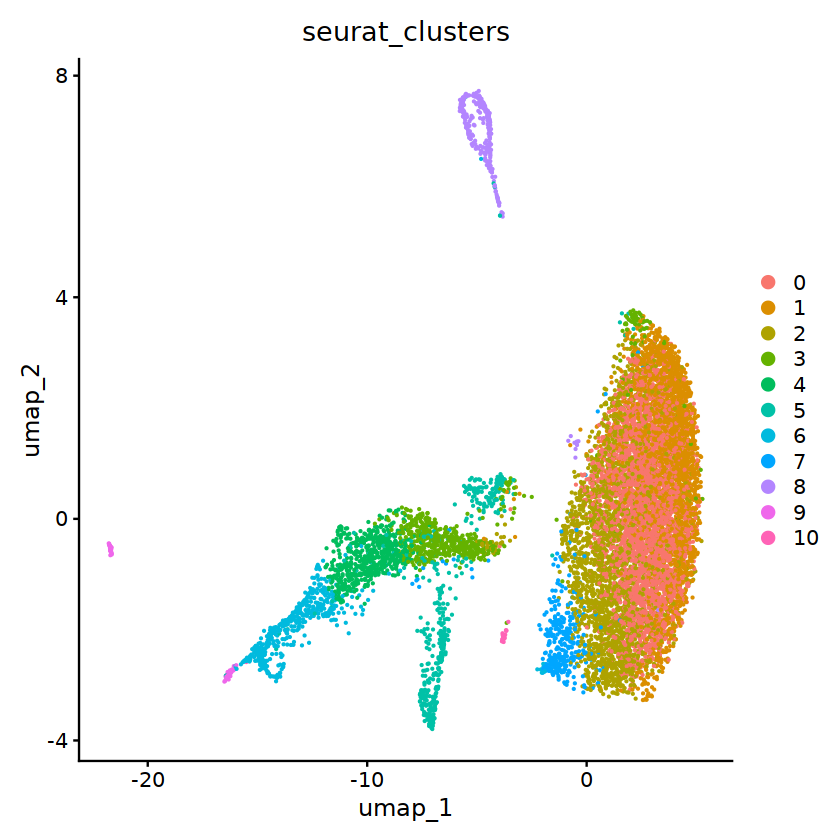

In [ ]:
ifnb = readRDS("hc_rbd_pd_joint_integrated.rds")
ifnb_testct <- subset(ifnb, subset = celltype == "microglia")
ifnb_testct <- FindNeighbors(ifnb_testct, reduction = "integrated.cca", dims = 1:30)
ifnb_testct <- FindClusters(ifnb_testct, resolution = 0.5)
ifnb_testct <- RunUMAP(ifnb_testct, dims = 1:30, reduction = "integrated.cca")
DimPlot(ifnb_testct, reduction = "umap", group.by = c("seurat_clusters"))

In [ ]:
gene_module_df <- read.csv("../../data/gene_module_df_c0.csv")
gene_module_df <- gene_module_df %>% select(-X)

In [25]:
gene_module_df

id,module,supermodule,dim_1,dim_2
<chr>,<int>,<int>,<dbl>,<dbl>
AL627309.1,17,1,-2.471072849,2.7299226
AL627309.5,21,1,-0.571008619,3.5495423
ISG15,15,1,-0.617749389,-0.3923915
TNFRSF4,28,1,2.070402417,0.9505741
SCNN1D,13,1,0.827746455,0.2989201
MRPL20,4,1,-2.026459392,-5.6364085
AL391244.2,26,1,0.537866298,0.8493323
CDK11A,21,1,-0.617199596,3.0641457
NADK,25,1,0.984833066,3.4845336


In [26]:
set.seed(384)
# Filter the dataframe for RBD modules
modules_of_interest <- c(6, 2, 21, 19, 10, 17, 25, 24, 26, 16)

# Create a list of gene sets for each module
gene_sets <- lapply(modules_of_interest, function(module) {
  gene_module_df$id[gene_module_df$module == module]
})

# Name the list with module numbers
names(gene_sets) <- modules_of_interest

In [27]:
length(gene_sets[['25']])

[1] 118

In [28]:
# Set the active identity to the disease column
Idents(ifnb_testct) <- "disease"

# Get the cell names for each group
rbd_cells <- WhichCells(ifnb_testct, ident = "RBD")
hc_cells <- WhichCells(ifnb_testct, ident = "HC")

# Extract the normalized expression matrix
expr_data <- GetAssayData(ifnb_testct, slot = "data")

# Initialize a list to store results
avg_log2FC_results <- list()

# Loop through each gene module in gene_sets
for (module_name in names(gene_sets)) {
  genes <- gene_sets[[module_name]]
  
  # Filter genes present in the expression matrix
  genes <- intersect(genes, rownames(expr_data))
  
  if (length(genes) == 0) next  # Skip empty modules
  
  # Compute average expression per gene in each group
  avg_expr_rbd <- rowMeans(expr_data[genes, rbd_cells, drop = FALSE])
  avg_expr_hc <- rowMeans(expr_data[genes, hc_cells, drop = FALSE])
  
  # Calculate avg_log2FC
  avg_log2FC <- log2(avg_expr_rbd + 1) - log2(avg_expr_hc + 1)
  
  # Store as data frame for each module
  avg_log2FC_results[[module_name]] <- data.frame(
    gene = genes,
    avg_log2FC = avg_log2FC
  )
}

# View results for a specific module
avg_log2FC_results[['25']]

,gene,avg_log2FC
,<chr>,<dbl>
NADK,NADK,0.062421142
MIR34AHG,MIR34AHG,0.190205082
PIK3CD,PIK3CD,0.110297354
VPS13D,VPS13D,0.112551496
EPHB2,EPHB2,-0.013715090
ATP5IF1,ATP5IF1,-0.029671272
MED18,MED18,0.010562793
ZBTB8OS,ZBTB8OS,0.089886336
STK40,STK40,0.045497576


In [29]:
go_analysis <- function(deg_results_by_cluster){
    set.seed(384)
    # Define the database(s) to use for EnrichR, focusing on GO Biological Process
    dbs <- c("GO_Biological_Process_2021")
    
    # Initialize a list to store enrichment results
    enrichment_results <- list()
    marker_counts <- list() 
    
    # Loop over each cluster in deg_results_by_cluster to perform enrichment analysis
    for (cluster_name in names(deg_results_by_cluster)) {
      # Retrieve DEGs for the current cluster from deg_results_by_cluster
      cluster_data <- deg_results_by_cluster[[cluster_name]]
      
      # Select significant DEGs (e.g., adjusted p-value < 0.05 and log fold change threshold)
      significant_genes <- rownames(cluster_data)
      marker_counts[[cluster_name]] <- length(significant_genes)
        
      # Perform enrichment analysis if there are significant genes
      if (length(significant_genes) > 0) {
        enrich_result <- enrichr(significant_genes, dbs)
        go_results <- enrich_result[["GO_Biological_Process_2021"]]
        
        # Sort results by adjusted p-value and select the top 10 processes
        go_results <- go_results[order(go_results$Adjusted.P.value), ]
        top_processes <- head(go_results, 10)
    
        if (nrow(top_processes) != 0) {
            # Initialize list to store the average fold change for each GO term
            avg_fc_for_terms <- numeric(nrow(top_processes))
            
            # Calculate the average fold change for each GO term in top_processes
            for (j in 1:nrow(top_processes)) {
              if (!is.na(top_processes$Genes[j]) && top_processes$Genes[j] != "") {
                genes_in_term <- strsplit(as.character(top_processes$Genes[j]), ";")[[1]]  # Split the genes string by semicolon
                
                # Only keep genes that are present in cluster_data
                genes_in_term <- genes_in_term[genes_in_term %in% rownames(cluster_data)]
                  
                # Retrieve fold changes for these genes
                if (length(genes_in_term) > 0) {
                  fc_values <- cluster_data[genes_in_term, "avg_log2FC"]
                  avg_fc_for_terms[j] <- mean(fc_values, na.rm = TRUE)  # Calculate the average, ignoring NA values
                } else {
                  avg_fc_for_terms[j] <- NA  # If no genes are found, set to NA
                }
              } else {
                avg_fc_for_terms[j] <- NA  # If 'Genes' is NA, set to NA
              }
            }
        
            # Add the average fold changes as a new column in top_processes
            top_processes$Avg_Log2FC <- avg_fc_for_terms
        }
        # Store the top GO processes for this cluster
        enrichment_results[[cluster_name]] <- top_processes
      }
    }
    return(list(marker_counts = marker_counts, enrichment_results = enrichment_results))
}

In [30]:
set.seed(384)
output <- go_analysis(avg_log2FC_results)
list2env(output, envir = .GlobalEnv)

Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  

<environment: R_GlobalEnv>

In [31]:
enrichment_results

,Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Odds.Ratio,Combined.Score,Genes,Avg_Log2FC
,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>,<dbl>
1,copper ion homeostasis (GO:0055070),4/17,5.147677e-05,0.06846186,0,0,24.485112,241.77529,ARF1;SLC31A1;XIAP;COMMD1,0.10995231
2,cytoplasmic translational initiation (GO:0002183),4/19,8.218710e-05,0.06846186,0,0,21.218280,199.59001,EIF4A1;EIF3M;EIF2S2;EIF4B,0.07823078
3,negative regulation of apoptotic signaling pathway (GO:2001234),6/78,4.538463e-04,0.15694598,0,0,6.665312,51.30792,OPA1;PLAUR;BCL2;HTT;RIPK1;TGFBR1,0.14799877
4,endocytic recycling (GO:0032456),5/52,4.893262e-04,0.15694598,0,0,8.485227,64.67848,EHD4;EIPR1;DENND1A;VPS53;RAB7A,0.14125647
5,signal transduction in response to DNA damage (GO:0042770),5/52,4.893262e-04,0.15694598,0,0,8.485227,64.67848,MAP3K20;GRB2;MDM4;TP53BP1;ATR,0.17512011
6,ribosome biogenesis (GO:0042254),9/192,7.599663e-04,0.15694598,0,0,3.959725,28.43968,UTP15;LSG1;NOP58;UTP4;HEATR1;DDX31;HEATR3;UTP20;MDN1,0.10549821
7,cytoskeleton organization (GO:0007010),7/120,8.243764e-04,0.15694598,0,0,4.964602,35.25306,FMNL2;DPYSL2;PACSIN2;MICAL2;NEDD9;LARP4;SYNE3,0.15908681
8,tRNA export from nucleus (GO:0006409),4/34,8.478474e-04,0.15694598,0,0,10.601075,74.97939,NUP210;XPOT;NUP153;NUP98,0.12077243
9,tRNA-containing ribonucleoprotein complex export from nucleus (GO:0071431),4/34,8.478474e-04,0.15694598,0,0,10.601075,74.97939,NUP210;XPOT;NUP153;NUP98,0.12077243


In [32]:
gm_names <- names(avg_log2FC_results)
gm_names <- as.character(sort(as.integer(gm_names)))
gm_names

[1] "2"  "6"  "10" "16" "17" "19" "21" "24" "25" "26"

In [ ]:
set.seed(384) 
# Prepare matrices for plotting
# Collect unique biological processes across all clusters
all_processes <- unique(unlist(lapply(enrichment_results, function(x) x$Term)))
enrichment_matrix <- matrix(NA, nrow = length(all_processes), ncol = 10,
                            dimnames = list(all_processes, gm_names))
fc_matrix <- matrix(NA, nrow = length(all_processes), ncol = 10,
                    dimnames = list(all_processes, gm_names))

# Fill the matrices with -log10(adjusted p-value) and Avg_Log2FC for each process and cluster
for (cluster_name in gm_names) {
  if (!is.null(enrichment_results[[cluster_name]]) && nrow(enrichment_results[[cluster_name]]) > 0) {
    for (j in 1:nrow(enrichment_results[[cluster_name]])) {
      process <- enrichment_results[[cluster_name]]$Term[j]
      pval <- enrichment_results[[cluster_name]]$Adjusted.P.value[j]
      avg_log2fc <- enrichment_results[[cluster_name]]$Avg_Log2FC[j]
  
      # Fill p-value matrix with -log10(p-value)
      enrichment_matrix[process, cluster_name] <- -log10(pval)
      
      # Fill fold change matrix with Avg_Log2FC
      fc_matrix[process, cluster_name] <- avg_log2fc
      
    }
  }
}   

# Replace NA values with a low number (e.g., 0) for better plotting
enrichment_matrix[is.na(enrichment_matrix)] <- 0

output_pdf = "../../man_figs_pdf/monocle_go_RBDvsHC_logp.pdf"
# Plot the heatmap using pheatmap
pheatmap::pheatmap(enrichment_matrix,
                   color = c(
                     colorRampPalette(c("white", '#ef3b2c'))(10),  # More resolution for small values
                     colorRampPalette(c('#ef3b2c','#cb181d','#a50f15','#67000d'))(90) # High contrast for larger values
                   ),
                   na_col = "grey",           # Use grey for NA values (e.g., processes not enriched in clusters)
                   main = "Enriched BP of Microglial State Signatures (-log10 p-value)",
                   cluster_rows = TRUE,       # Cluster processes for better visualization
                   cluster_cols = TRUE,      # Do not cluster clusters (retain the original order)
                   angle_col = 45,            # Rotate column names for readability
                   fontsize_row = 6,          # Font size for process names
                   fontsize_col = 8,
                   filename = output_pdf)         # Font size for cluster labels
print("Logp Plot saved")

# Replace NA values with a low number (e.g., 0) for better plotting
fc_matrix[is.na(fc_matrix)] <- 0

# Define the custom color palettes
# negative_colors <- colorRampPalette(c('#f7fbff','#deebf7','#c6dbef','#9ecae1','#6baed6','#4292c6', '#2171b5', '#084594'))(50)
negative_colors <- colorRampPalette(c('#084594','#2171b5','#4292c6','#6baed6','#9ecae1','#c6dbef', '#deebf7', '#f7fbff'))(50)
positive_colors <- colorRampPalette(c('#fff5f0','#fee0d2','#fcbba1','#fc9272','#fb6a4a','#ef3b2c','#cb181d','#99000d'))(50)

# Combine palettes with white at 0
custom_colors <- c(negative_colors, "white", positive_colors)

# Define custom breaks to center the color scale at 0
max_abs_value <- max(abs(fc_matrix))
breaks <- seq(-max_abs_value, max_abs_value, length.out = length(custom_colors) + 1)

output_pdf = "../../man_figs_pdf/monocle_go_RBDvsHC_log2fc.pdf"
pheatmap::pheatmap(fc_matrix,
                   color = custom_colors,
                   breaks = breaks,              # Use custom breaks for diverging colors
                   na_col = "grey",              # Use grey for NA values
                   main = "Average Log2 Fold Change",
                   cluster_rows = TRUE,          # Cluster processes for better visualization
                   cluster_cols = TRUE,          # Cluster clusters for better visualization
                   angle_col = 45,               # Rotate column names for readability
                   fontsize_row = 6,             # Font size for process names
                   fontsize_col = 8,
                   filename = output_pdf)             # Font size for cluster labels
print("Log2FC File saved")                                                  

[1] "Logp Plot saved"
[1] "Log2FC File saved"


In [5]:
# Specify the database
db <- "GO_Biological_Process_2021"

# Run enrichment for each module
go_results <- lapply(names(gene_sets), function(module) {
  genes <- gene_sets[[module]]
  enrichr(genes, db)
})

# Name the results list with module numbers
names(go_results) <- names(gene_sets)

Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  

In [6]:
# Example: View the results for module 6
go_results[["6"]]

Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Odds.Ratio,Combined.Score,Genes
<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>
copper ion homeostasis (GO:0055070),4/17,5.147677e-05,0.06846186,0,0,24.485112,241.77529,ARF1;SLC31A1;XIAP;COMMD1
cytoplasmic translational initiation (GO:0002183),4/19,8.218710e-05,0.06846186,0,0,21.218280,199.59001,EIF4A1;EIF3M;EIF2S2;EIF4B
negative regulation of apoptotic signaling pathway (GO:2001234),6/78,4.538463e-04,0.15694598,0,0,6.665312,51.30792,OPA1;PLAUR;BCL2;HTT;RIPK1;TGFBR1
endocytic recycling (GO:0032456),5/52,4.893262e-04,0.15694598,0,0,8.485227,64.67848,EHD4;EIPR1;DENND1A;VPS53;RAB7A
signal transduction in response to DNA damage (GO:0042770),5/52,4.893262e-04,0.15694598,0,0,8.485227,64.67848,MAP3K20;GRB2;MDM4;TP53BP1;ATR
ribosome biogenesis (GO:0042254),9/192,7.599663e-04,0.15694598,0,0,3.959725,28.43968,UTP15;LSG1;NOP58;UTP4;HEATR1;DDX31;HEATR3;UTP20;MDN1
cytoskeleton organization (GO:0007010),7/120,8.243764e-04,0.15694598,0,0,4.964602,35.25306,FMNL2;DPYSL2;PACSIN2;MICAL2;NEDD9;LARP4;SYNE3
tRNA export from nucleus (GO:0006409),4/34,8.478474e-04,0.15694598,0,0,10.601075,74.97939,NUP210;XPOT;NUP153;NUP98
tRNA-containing ribonucleoprotein complex export from nucleus (GO:0071431),4/34,8.478474e-04,0.15694598,0,0,10.601075,74.97939,NUP210;XPOT;NUP153;NUP98


In [ ]:
# Save results to files
for (module in names(go_results)) {
  write.csv(go_results[[module]][[db]], 
            file = paste0("../../DEG_GO_Analysis/Monocle_GO_Analysis/GO_Enrichment_Module_", module, ".csv"), 
            row.names = FALSE)
}

In [ ]:
# Load required packages
library(readr)
library(openxlsx)
library(tools)

# Set folder containing the CSV files
folder_path <- "../../DEG_GO_Analysis/Monocle_GO_Analysis"

# List all CSV files in the folder
csv_files <- list.files(path = folder_path, pattern = "\\.csv$", full.names = TRUE)

# Create a new Excel workbook
wb <- createWorkbook()

# Loop through each CSV file and add as a new worksheet
for (file in csv_files) {
  # Read CSV
  data <- read_csv(file)
  
  # Generate sheet name from file name
  base_name <- file_path_sans_ext(basename(file))  # removes .csv
  sheet_name <- gsub("GO_Enrichment_", "", base_name)  # keep only 'Module_xx'
  
  # Add worksheet
  addWorksheet(wb, sheetName = sheet_name)
  writeData(wb, sheet = sheet_name, x = data)
}

# Save to Excel file
saveWorkbook(wb, file = "../../DEG_GO_Analysis/Monocle_GO_Analysis/GO_Enrichment_all_RBD_modules.xlsx", overwrite = TRUE)

Warning message:
“package ‘readr’ was built under R version 4.3.3”

Attaching package: ‘readr’


The following object is masked from ‘package:scales’:

    col_factor


Rows: 1666 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): Term, Overlap, Genes
dbl (6): P.value, Adjusted.P.value, Old.P.value, Old.Adjusted.P.value, Odds....

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 980 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): Term, Overlap, Genes
dbl (6): P.value, Adjusted.P.value, Old.P.value, Old.Adjusted.P.value, Odds....

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1666 Columns: 9
── Column specification ────────────────────